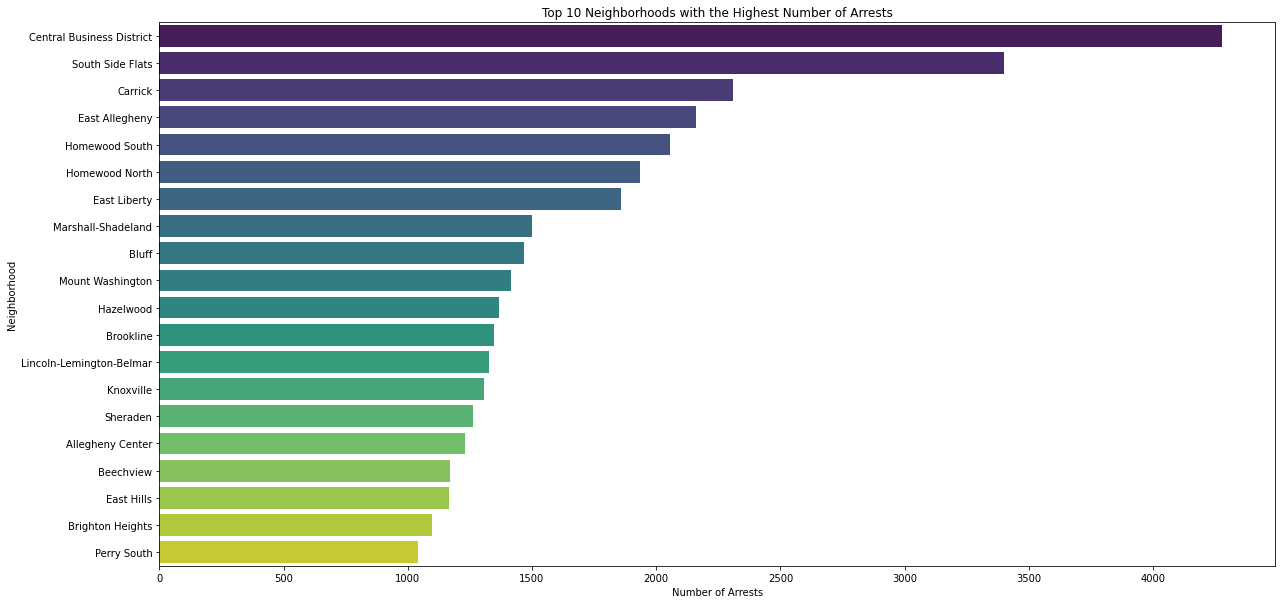

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Arrests.csv")

arrests_per_neighborhood = data['INCIDENTNEIGHBORHOOD'].value_counts()

top_20_neighborhoods = arrests_per_neighborhood.head(20)

# Create a bar graph using Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=top_20_neighborhoods.values, y=top_20_neighborhoods.index, palette='viridis')
plt.title('Top 10 Neighborhoods with the Highest Number of Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()


# Crime Rate Analysis by Neighborhood
### In the provided Python code, the objective is to analyze and visualize the crime rates among different neighborhoods using a dataset named "Arrests.csv". The code utilizes the pandas library to read the CSV file and store the data in a DataFrame. The dataset appears to contain information related to arrests, with a specific focus on the neighborhood where each incident occurred.

###The analysis begins by creating a series called arrests_per_neighborhood, which represents the count of arrests in each neighborhood. Subsequently, the code extracts the top 20 neighborhoods with the highest number of arrests and creates a bar graph to visualize this information. The visualization is generated using the Seaborn and Matplotlib libraries, where Seaborn's barplot function is employed to create a horizontal bar graph.

The resulting visualization provides a clear representation of the top 20 neighborhoods with the highest arrest counts, aiding in the identification and comparison of crime rates across different areas. The graph includes labels for the number of arrests on the x-axis and the respective neighborhoods on the y-axis, making it an effective tool for understanding the distribution of arrests across neighborhoods.

In [2]:
import pandas as pd
from tabulate import tabulate

playground_data = pd.read_csv("Playground.csv")

playgrounds_per_neighborhood = playground_data['neighborhood'].value_counts()

# DataFrame for better formatting
playgrounds_table = pd.DataFrame({'Neighborhood': playgrounds_per_neighborhood.index, 'Playgrounds Count': playgrounds_per_neighborhood.values})

# Print the entire table
print(tabulate(playgrounds_table, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤═════════════════════╕
│    │ Neighborhood             │   Playgrounds Count │
╞════╪══════════════════════════╪═════════════════════╡
│  0 │ Squirrel Hill South      │                   8 │
├────┼──────────────────────────┼─────────────────────┤
│  1 │ Beechview                │                   5 │
├────┼──────────────────────────┼─────────────────────┤
│  2 │ South Side Slopes        │                   5 │
├────┼──────────────────────────┼─────────────────────┤
│  3 │ Highland Park            │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  4 │ Sheraden                 │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  5 │ Beltzhoover              │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  6 │ Allegheny Center         │                   4 │
├────┼──────────────────────────┼─────────────────────┤
│  7 │ Carrick                  │               

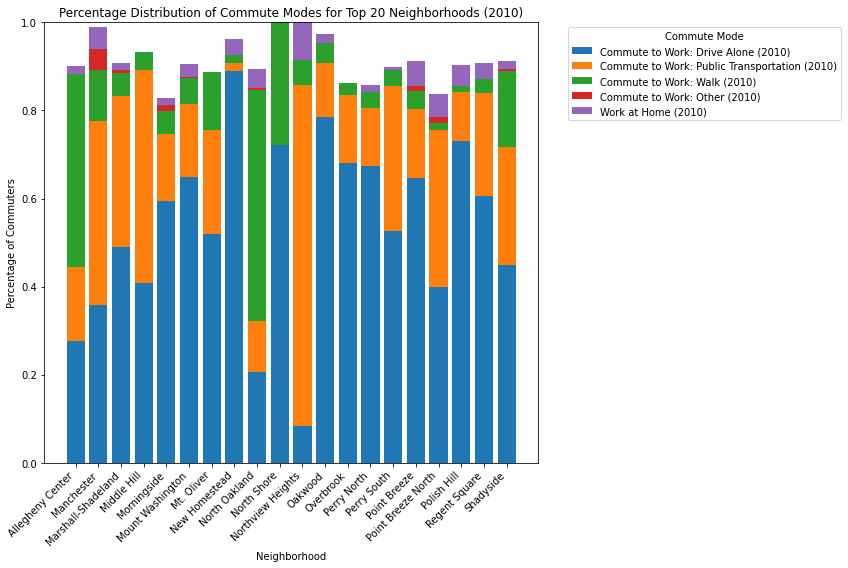

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_commute_dataset.csv' with the actual file path)
commute_data = pd.read_csv("CensusD.csv")

neighborhoods = commute_data['Neighborhood']

# List of commute columns to visualize
commute_columns = [
    'Commute to Work: Drive Alone (2010)',
    'Commute to Work: Public Transportation (2010)',
    'Commute to Work: Walk (2010)',
    'Commute to Work: Other (2010)',
    'Work at Home (2010)'
]

top_20_neighborhoods = neighborhoods.value_counts().head(20).index
filtered_data = commute_data[commute_data['Neighborhood'].isin(top_20_neighborhoods)]

# Plotting
plt.figure(figsize=(12, 8))
bottom = None

for column in commute_columns:
    plt.bar(filtered_data['Neighborhood'], filtered_data[column], label=column, bottom=bottom)
    if bottom is None:
        bottom = filtered_data[column]
    else:
        bottom += filtered_data[column]

plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Commuters')
plt.title('Percentage Distribution of Commute Modes for Top 20 Neighborhoods (2010)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commute Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('employment.csv')

# Convert columns to numeric
df["Total Age 16+ N'hood Residents Employed (2010 Est.)"] = pd.to_numeric(df["Total Age 16+ N'hood Residents Employed (2010 Est.)"], errors='coerce')
df["Population (2010)"] = pd.to_numeric(df["Population (2010)"], errors='coerce')

# Group by neighborhood and calculate employment rate for each group
df['employment_rate'] = (df["Total Age 16+ N'hood Residents Employed (2010 Est.)"] / df["Population (2010)"]) * 100
result_df = df.groupby('Neighborhood').agg({'employment_rate': 'mean'}).reset_index()

# Print the resulting DataFrame
print(result_df.head(20))


                 Neighborhood  employment_rate
0            Allegheny Center        41.371919
1              Allegheny West        32.683983
2                   Allentown              NaN
3                   Arlington              NaN
4           Arlington Heights        29.508197
5                  Banksville              NaN
6           Bedford Dwellings              NaN
7                   Beechview              NaN
8                 Beltzhoover              NaN
9                  Bloomfield              NaN
10                      Bluff              NaN
11                    Bon Air        57.054455
12           Brighton Heights              NaN
13                  Brookline              NaN
14       California-Kirkbride        29.829172
15                    Carrick              NaN
16  Central Business District              NaN
17      Central Lawrenceville              NaN
18          Central Northside              NaN
19            Central Oakland              NaN


In [43]:
import pandas as pd
from tabulate import tabulate

# Load the datasets
arrests_df = pd.read_csv('Arrests.csv')
employment_df = pd.read_csv('employment.csv')
playground_df = pd.read_csv('Playground.csv')

# Handle non-numeric values in the employment data
employment_df['Number Employed'] = pd.to_numeric(employment_df["Total Age 16+ N'hood Residents Employed (2010 Est.)"], errors='coerce')
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Check for non-numeric values in 'Population (2010)' column
non_numeric_mask = pd.to_numeric(employment_df['Population (2010)'], errors='coerce').isna()
non_numeric_population = employment_df[non_numeric_mask]
print("Non-numeric values in Population (2010):", non_numeric_population['Population (2010)'].unique())

# Replace non-numeric values with NaN
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Calculate the total number of arrests per neighborhood
arrests_total = arrests_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrests_total.columns = ['Neighborhood', 'Arrests']

# Calculate employment rate per neighborhood
employment_df['Employment Rate'] = employment_df['Number Employed'] / employment_df['Population (2010)']
employment_rate = employment_df.groupby('Neighborhood')['Employment Rate'].mean().reset_index()

# Calculate total playgrounds per neighborhood
playgrounds_total = playground_df.groupby('neighborhood').size().reset_index(name='Number of Playgrounds')

# Min-max scale the individual components
arrests_total['Arrests_Scaled'] = (arrests_total['Arrests'] - arrests_total['Arrests'].min()) / (arrests_total['Arrests'].max() - arrests_total['Arrests'].min())
employment_rate['Employment Rate_Scaled'] = (employment_rate['Employment Rate'] - employment_rate['Employment Rate'].min()) / (employment_rate['Employment Rate'].max() - employment_rate['Employment Rate'].min())
playgrounds_total['Number of Playgrounds_Scaled'] = (playgrounds_total['Number of Playgrounds'] - playgrounds_total['Number of Playgrounds'].min()) / (playgrounds_total['Number of Playgrounds'].max() - playgrounds_total['Number of Playgrounds'].min())

# Create a dictionary to store individual results
results_dict = {}

# Calculate the weighted metric for each neighborhood
for neighborhood in set(arrests_total['Neighborhood']).union(employment_rate['Neighborhood']).union(playgrounds_total['neighborhood']):
    arrests_value = arrests_total.loc[arrests_total['Neighborhood'] == neighborhood, 'Arrests_Scaled'].values[0] if neighborhood in arrests_total['Neighborhood'].values else 0
    employment_value = employment_rate.loc[employment_rate['Neighborhood'] == neighborhood, 'Employment Rate_Scaled'].values[0] if neighborhood in employment_rate['Neighborhood'].values else 0
    playgrounds_value = playgrounds_total.loc[playgrounds_total['neighborhood'] == neighborhood, 'Number of Playgrounds_Scaled'].values[0] if neighborhood in playgrounds_total['neighborhood'].values else 0
    
    # Treat NaN values as 0
    arrests_value = 0 if pd.isna(arrests_value) else arrests_value
    employment_value = 0 if pd.isna(employment_value) else employment_value
    playgrounds_value = 0 if pd.isna(playgrounds_value) else playgrounds_value
    
    # Adjust weights to equally weigh employment and arrests, and lower weight for playgrounds
    weighted_metric = 0.45 * (1 - arrests_value) + 0.45 * employment_value + 0.1 * playgrounds_value
    
    results_dict[neighborhood] = {'Arrests': arrests_value, 'Employment Rate': employment_value, 'Number of Playgrounds': playgrounds_value, 'Weighted Metric': weighted_metric}

# Convert the results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
results_df.rename(columns={'index': 'Neighborhood'}, inplace=True)

# Sort the dataframe by 'Weighted Metric' in descending order
results_df = results_df.sort_values(by='Weighted Metric', ascending=False)

# Display the top 20 neighborhoods
top_20_neighborhoods = results_df[['Neighborhood', 'Weighted Metric']].head(20)
print(tabulate(top_20_neighborhoods, headers=['Neighborhood', 'Weighted Metric'], tablefmt='grid'))


Non-numeric values in Population (2010): [nan]
+----+----------------------+-------------------+
|    | Neighborhood         |   Weighted Metric |
+====+======================+===================+
| 39 | South Shore          |          0.869165 |
+----+----------------------+-------------------+
|  4 | St. Clair            |          0.755652 |
+----+----------------------+-------------------+
| 65 | New Homestead        |          0.613606 |
+----+----------------------+-------------------+
| 82 | Regent Square        |          0.605716 |
+----+----------------------+-------------------+
| 90 | Spring Garden        |          0.597712 |
+----+----------------------+-------------------+
| 28 | Ridgemont            |          0.574888 |
+----+----------------------+-------------------+
| 35 | Bon Air              |          0.550905 |
+----+----------------------+-------------------+
| 84 | Hays                 |          0.547185 |
+----+----------------------+-------------------+
| 5

In [12]:
import pandas as pd

# Load your datasets (replace 'your_file_path' with the actual file paths)
file = pd.read_csv('employment.csv')
data = pd.read_csv('Arrests.csv')
playground_data = pd.read_csv('Playground.csv')

# Assign weights with small constants
weight_employment = 0.51  # Increase weight for employment with a small constant
weight_arrests = -0.49  # Invert and decrease the weight for arrests with a small constant
weight_playgrounds = 0.01  # Increase weight for playgrounds with a small constant

# Combine all unique neighborhoods from the three datasets
import pandas as pd

# Assign weights with small constants
weight_employment = 0.51  # Increase weight for employment with a small constant
weight_arrests = -0.49  # Invert and decrease the weight for arrests with a small constant
weight_playgrounds = 0.01  # Increase weight for playgrounds with a small constant

# Create a list of all neighborhoods
all_neighborhoods = pd.concat([
    file['Neighborhood'],
    data['INCIDENTNEIGHBORHOOD'],
    playground_data['neighborhood']
]).unique()

# Remove '0' from the list of neighborhoods
all_neighborhoods = all_neighborhoods[all_neighborhoods != 0]

# Create a DataFrame with all neighborhoods
neighborhoods_df = pd.DataFrame({'Neighborhood': all_neighborhoods})

# Convert 'Neighborhood' to lowercase for case-insensitivity
neighborhoods_df['Neighborhood'] = neighborhoods_df['Neighborhood'].str.lower()

# Calculate metrics for each dataset
file_metrics = file.groupby('Neighborhood')['Weighted Employment'].sum().reset_index()
data_metrics = data.groupby('INCIDENTNEIGHBORHOOD')['Weighted Arrests'].sum().reset_index()
playground_metrics = playground_data.groupby('neighborhood')['Weighted Playgrounds'].sum().reset_index()

# Fill NaN values with 0
file_metrics = file_metrics.fillna(0)
data_metrics = data_metrics.fillna(0)
playground_metrics = playground_metrics.fillna(0)

# Combine metrics across all datasets for each neighborhood with adjusted weights
overall_metric_by_neighborhood = pd.DataFrame({
    'Neighborhood': neighborhoods_df['Neighborhood'],
    'OverallMetric': (
        weight_employment * file_metrics.set_index('Neighborhood')['Weighted Employment'] +
        weight_arrests * (-data_metrics.set_index('INCIDENTNEIGHBORHOOD')['Weighted Arrests']) +
        weight_playgrounds * playground_metrics.set_index('neighborhood')['Weighted Playgrounds']
    )
}).fillna(0)

overall_metric_by_neighborhood = overall_metric_by_neighborhood.sort_values(by='OverallMetric', ascending=False)

# Print the result
print("\nOverall Metric by Neighborhood (Descending Order):")
print(overall_metric_by_neighborhood[['Neighborhood', 'OverallMetric']].head(20))


KeyError: 'Column not found: Weighted Employment'

In [1]:
import pandas as pd
from tabulate import tabulate

# Load the datasets
arrests_df = pd.read_csv('Arrests.csv')
employment_df = pd.read_csv('employment.csv')
playground_df = pd.read_csv('Playground.csv')

# Handle non-numeric values in the employment data
employment_df['Number Employed'] = pd.to_numeric(employment_df["Total Age 16+ N'hood Residents Employed (2010 Est.)"], errors='coerce')
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Check for non-numeric values in 'Population (2010)' column
non_numeric_mask = pd.to_numeric(employment_df['Population (2010)'], errors='coerce').isna()
non_numeric_population = employment_df[non_numeric_mask]
print("Non-numeric values in Population (2010):", non_numeric_population['Population (2010)'].unique())

# Replace non-numeric values with NaN
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Calculate the total number of arrests per neighborhood
arrests_total = arrests_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrests_total.columns = ['Neighborhood', 'Arrests']

# Calculate employment rate per neighborhood
employment_df['Employment Rate'] = employment_df['Number Employed'] / employment_df['Population (2010)']
employment_rate = employment_df.groupby('Neighborhood')['Employment Rate'].mean().reset_index()

# If employment rate is NaN, fill with the mean of all neighborhoods
mean_employment_rate = employment_rate['Employment Rate'].mean()
employment_rate['Employment Rate'].fillna(mean_employment_rate, inplace=True)

# Calculate total playgrounds per neighborhood
playgrounds_total = playground_df.groupby('neighborhood').size().reset_index(name='Number of Playgrounds')

# Min-max scale the individual components
arrests_total['Arrests_Scaled'] = (arrests_total['Arrests'] - arrests_total['Arrests'].min()) / (arrests_total['Arrests'].max() - arrests_total['Arrests'].min())
employment_rate['Employment Rate_Scaled'] = (employment_rate['Employment Rate'] - employment_rate['Employment Rate'].min()) / (employment_rate['Employment Rate'].max() - employment_rate['Employment Rate'].min())
playgrounds_total['Number of Playgrounds_Scaled'] = (playgrounds_total['Number of Playgrounds'] - playgrounds_total['Number of Playgrounds'].min()) / (playgrounds_total['Number of Playgrounds'].max() - playgrounds_total['Number of Playgrounds'].min())

# Create a dictionary to store individual results
results_dict = {}

# Calculate the weighted metric for each neighborhood
for neighborhood in set(arrests_total['Neighborhood']).union(employment_rate['Neighborhood']).union(playgrounds_total['neighborhood']):
    arrests_value = arrests_total.loc[arrests_total['Neighborhood'] == neighborhood, 'Arrests_Scaled'].values[0] if neighborhood in arrests_total['Neighborhood'].values else 0
    employment_value = employment_rate.loc[employment_rate['Neighborhood'] == neighborhood, 'Employment Rate_Scaled'].values[0] if neighborhood in employment_rate['Neighborhood'].values else mean_employment_rate
    playgrounds_value = playgrounds_total.loc[playgrounds_total['neighborhood'] == neighborhood, 'Number of Playgrounds_Scaled'].values[0] if neighborhood in playgrounds_total['neighborhood'].values else 0
    
    # Treat NaN values as 0
    arrests_value = 0 if pd.isna(arrests_value) else arrests_value
    employment_value = 0 if pd.isna(employment_value) else employment_value
    playgrounds_value = 0 if pd.isna(playgrounds_value) else playgrounds_value
    
    # Adjust weights to equally weigh employment and arrests, and lower weight for playgrounds
    weighted_metric = 0.45 * (1 - arrests_value) + 0.45 * employment_value + 0.1 * playgrounds_value
    
    results_dict[neighborhood] = {'Arrests': arrests_value, 'Employment Rate': employment_value, 'Number of Playgrounds': playgrounds_value, 'Weighted Metric': weighted_metric}

# Convert the results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
results_df.rename(columns={'index': 'Neighborhood'}, inplace=True)

# Sort the dataframe by 'Weighted Metric' in descending order
results_df = results_df.sort_values(by='Weighted Metric', ascending=False)

# Display the top 20 neighborhoods using tabulate
top_20_neighborhoods = results_df[['Neighborhood', 'Weighted Metric']].head(20)
print(tabulate(top_20_neighborhoods, headers=['Neighborhood', 'Weighted Metric'], tablefmt='grid'))


Non-numeric values in Population (2010): [nan]
+----+-----------------------------+-------------------+
|    | Neighborhood                |   Weighted Metric |
+====+=============================+===================+
| 21 | South Shore                 |          0.869165 |
+----+-----------------------------+-------------------+
| 81 | St. Clair                   |          0.755652 |
+----+-----------------------------+-------------------+
| 61 | Mt. Oliver Neighborhood     |          0.685592 |
+----+-----------------------------+-------------------+
| 84 | Troy Hill-Herrs Island      |          0.685171 |
+----+-----------------------------+-------------------+
| 71 | Mt. Oliver Boro             |          0.683908 |
+----+-----------------------------+-------------------+
| 65 | Outside County              |          0.679909 |
+----+-----------------------------+-------------------+
| 76 | Outside State               |          0.679067 |
+----+-----------------------------+-----

In [2]:
import pandas as pd

# Load the datasets
arrests_df = pd.read_csv('Arrests.csv')
employment_df = pd.read_csv('employment.csv')
playground_df = pd.read_csv('Playground.csv')

# Handle non-numeric values in the employment data
employment_df['Number Employed'] = pd.to_numeric(employment_df["Total Age 16+ N'hood Residents Employed (2010 Est.)"], errors='coerce')
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Check for non-numeric values in 'Population (2010)' column
non_numeric_mask = pd.to_numeric(employment_df['Population (2010)'], errors='coerce').isna()
non_numeric_population = employment_df[non_numeric_mask]
print("Non-numeric values in Population (2010):", non_numeric_population['Population (2010)'].unique())

# Replace non-numeric values with NaN
employment_df['Population (2010)'] = pd.to_numeric(employment_df['Population (2010)'], errors='coerce')

# Replace neighborhood names to combine 'South Shore' and 'South Side Flats'
arrests_df['INCIDENTNEIGHBORHOOD'].replace({'South Shore': 'South Shore & South Side Flats', 'South Side Flats': 'South Shore & South Side Flats'}, inplace=True)
employment_df['Neighborhood'].replace({'South Shore': 'South Shore & South Side Flats', 'South Side Flats': 'South Shore & South Side Flats'}, inplace=True)
playground_df['neighborhood'].replace({'South Shore': 'South Shore & South Side Flats', 'South Side Flats': 'South Shore & South Side Flats'}, inplace=True)

# Calculate the total number of arrests per neighborhood
arrests_total = arrests_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrests_total.columns = ['Neighborhood', 'Arrests']

# Calculate employment rate per neighborhood
employment_df['Employment Rate'] = employment_df['Number Employed'] / employment_df['Population (2010)']
employment_rate = employment_df.groupby('Neighborhood')['Employment Rate'].mean().reset_index()

# Calculate total playgrounds per neighborhood
playgrounds_total = playground_df.groupby('neighborhood').size().reset_index(name='Number of Playgrounds')

# Min-max scale the individual components
arrests_total['Arrests_Scaled'] = (arrests_total['Arrests'] - arrests_total['Arrests'].min()) / (arrests_total['Arrests'].max() - arrests_total['Arrests'].min())
employment_rate['Employment Rate_Scaled'] = (employment_rate['Employment Rate'] - employment_rate['Employment Rate'].min()) / (employment_rate['Employment Rate'].max() - employment_rate['Employment Rate'].min())
playgrounds_total['Number of Playgrounds_Scaled'] = (playgrounds_total['Number of Playgrounds'] - playgrounds_total['Number of Playgrounds'].min()) / (playgrounds_total['Number of Playgrounds'].max() - playgrounds_total['Number of Playgrounds'].min())

# Create a dictionary to store individual results
results_dict = {}

# Calculate the weighted metric for each neighborhood
for neighborhood in set(arrests_total['Neighborhood']).union(employment_rate['Neighborhood']).union(playgrounds_total['neighborhood']):
    arrests_value = arrests_total.loc[arrests_total['Neighborhood'] == neighborhood, 'Arrests_Scaled'].sum() if neighborhood in arrests_total['Neighborhood'].values else 0
    employment_value = employment_rate.loc[employment_rate['Neighborhood'] == neighborhood, 'Employment Rate_Scaled'].sum() if neighborhood in employment_rate['Neighborhood'].values else 0
    playgrounds_value = playgrounds_total.loc[playgrounds_total['neighborhood'] == neighborhood, 'Number of Playgrounds_Scaled'].sum() if neighborhood in playgrounds_total['neighborhood'].values else 0
    
    # Treat NaN values as 0
    arrests_value = 0 if pd.isna(arrests_value) else arrests_value
    employment_value = 0 if pd.isna(employment_value) else employment_value
    playgrounds_value = 0 if pd.isna(playgrounds_value) else playgrounds_value
    
    # Adjust weights to equally weigh employment and arrests, and lower weight for playgrounds
    weighted_metric = 0.45 * (1 - arrests_value) + 0.45 * employment_value + 0.1 * playgrounds_value
    
    results_dict[neighborhood] = {'Arrests': arrests_value, 'Employment Rate': employment_value, 'Number of Playgrounds': playgrounds_value, 'Weighted Metric': weighted_metric}

# Convert the results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
results_df.rename(columns={'index': 'Neighborhood'}, inplace=True)

# Sort the dataframe by 'Weighted Metric' in descending order
results_df = results_df.sort_values(by='Weighted Metric', ascending=False)

# Display the top 20 neighborhoods
top_20_neighborhoods = results_df[['Neighborhood', 'Weighted Metric']].head(20)
print(top_20_neighborhoods)


Non-numeric values in Population (2010): [nan]
                      Neighborhood  Weighted Metric
80                       St. Clair         0.755652
96                   New Homestead         0.613606
21                   Regent Square         0.605716
28                   Spring Garden         0.597712
71                       Ridgemont         0.574888
46                         Bon Air         0.550905
18                            Hays         0.547185
26                      Mt. Oliver         0.541061
56                  Chartiers City         0.534049
67  South Shore & South Side Flats         0.525850
15                  Allegheny West         0.510384
65               Arlington Heights         0.500502
68                  Strip District         0.499610
2                           Esplen         0.489174
50                   East Carnegie         0.488185
42                     North Shore         0.486317
95            California-Kirkbride         0.485334
47               